In [1]:
import os
import pandas as pd
import networkx as nx

# Đường dẫn tới folder dữ liệu (bạn điều chỉnh nếu cần)
data_dir = "/kaggle/input/facebook-ego-network/facebook"

# Danh sách các ego users (dựa trên tên file)
ego_ids = set()
for file in os.listdir(data_dir):
    if file.endswith('.edges'):
        ego_id = file.split('.')[0]
        ego_ids.add(ego_id)

print("Danh sách ego:", sorted(ego_ids))

# Đọc dữ liệu từng ego vào dictionary
ego_graphs = {}
ego_features = {}
ego_egofeatures = {}
ego_featnames = {}
ego_circles = {}

for ego_id in ego_ids:
    # Đọc edges
    edges_path = os.path.join(data_dir, f"{ego_id}.edges")
    G = nx.read_edgelist(edges_path)
    ego_graphs[ego_id] = G

    # Đọc features
    feat_path = os.path.join(data_dir, f"{ego_id}.feat")
    if os.path.exists(feat_path):
        features = pd.read_csv(feat_path, delimiter=" ", header=None)
        ego_features[ego_id] = features

    # Đọc ego features
    egofeat_path = os.path.join(data_dir, f"{ego_id}.egofeat")
    if os.path.exists(egofeat_path):
        egofeat = pd.read_csv(egofeat_path, delimiter=" ", header=None)
        ego_egofeatures[ego_id] = egofeat

    # Đọc feature names
    featnames_path = os.path.join(data_dir, f"{ego_id}.featnames")
    if os.path.exists(featnames_path):
        with open(featnames_path, "r") as f:
            featnames = [line.strip() for line in f.readlines()]
            ego_featnames[ego_id] = featnames

    # Đọc circles nếu có
    circles_path = os.path.join(data_dir, f"{ego_id}.circles")
    if os.path.exists(circles_path):
        with open(circles_path, "r") as f:
            circles = []
            for line in f:
                tokens = line.strip().split()
                circles.append(tokens[1:])  # Bỏ tên circle
            ego_circles[ego_id] = circles

print("Số lượng ego network đã load:", len(ego_graphs))

Danh sách ego: ['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698']
Số lượng ego network đã load: 10


In [2]:
import os

# Đường dẫn đến thư mục chứa dữ liệu trên Kaggle
data_dir = '/kaggle/input/facebook-ego-network/facebook'  # bạn chỉnh lại tên thư mục đúng nếu khác

# Liệt kê các file
all_files = os.listdir(data_dir)
all_files = sorted(all_files)
for file in all_files:
    print(file)


0.circles
0.edges
0.egofeat
0.feat
0.featnames
107.circles
107.edges
107.egofeat
107.feat
107.featnames
1684.circles
1684.edges
1684.egofeat
1684.feat
1684.featnames
1912.circles
1912.edges
1912.egofeat
1912.feat
1912.featnames
3437.circles
3437.edges
3437.egofeat
3437.feat
3437.featnames
348.circles
348.edges
348.egofeat
348.feat
348.featnames
3980.circles
3980.edges
3980.egofeat
3980.feat
3980.featnames
414.circles
414.edges
414.egofeat
414.feat
414.featnames
686.circles
686.edges
686.egofeat
686.feat
686.featnames
698.circles
698.edges
698.egofeat
698.feat
698.featnames


In [3]:
# Ví dụ: đọc file '0.edges'
with open(os.path.join(data_dir, '0.edges'), 'r') as f:
    lines = f.readlines()
    print(">>> File 0.edges (các cạnh):")
    for line in lines[:10]:  # hiển thị 10 dòng đầu
        print(line.strip())


>>> File 0.edges (các cạnh):
236 186
122 285
24 346
271 304
176 9
130 329
204 213
252 332
82 65
276 26


In [4]:
import pandas as pd

feat_file = os.path.join(data_dir, '0.feat')
feat_df = pd.read_csv(feat_file, sep=' ', header=None)
print(">>> File 0.feat (đặc trưng các bạn bè):")
print(feat_df.head())


>>> File 0.feat (đặc trưng các bạn bè):
   0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    3    0    0    0    0    0    0    0    1    0  ...    0    0    0    1   
3    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   219  220  221  222  223  224  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 225 columns]


In [5]:
with open(os.path.join(data_dir, '0.featnames'), 'r') as f:
    print(">>> File 0.featnames (tên đặc trưng):")
    for line in f.readlines()[:10]:
        print(line.strip())


>>> File 0.featnames (tên đặc trưng):
0 birthday;anonymized feature 0
1 birthday;anonymized feature 1
2 birthday;anonymized feature 2
3 birthday;anonymized feature 3
4 birthday;anonymized feature 4
5 birthday;anonymized feature 5
6 birthday;anonymized feature 6
7 birthday;anonymized feature 7
8 education;classes;id;anonymized feature 8
9 education;classes;id;anonymized feature 9


In [6]:
with open(os.path.join(data_dir, '0.circles'), 'r') as f:
    print(">>> File 0.circles (các nhóm bạn):")
    for line in f.readlines():
        print(line.strip())


>>> File 0.circles (các nhóm bạn):
circle0	71	215	54	61	298	229	81	253	193	97	264	29	132	110	163	259	183	334	245	222
circle1	173
circle2	155	99	327	140	116	147	144	150	270
circle3	51	83	237
circle4	125	344	295	257	55	122	223	59	268	280	84	156	258	236	250	239	69
circle5	23
circle6	337	289	93	17	111	52	137	343	192	35	326	310	214	32	115	321	209	312	41	20
circle7	225	46
circle8	282
circle9	336	204	74	206	292	146	154	164	279	73
circle10	42	14	216	2
circle11	324	265	54	161	298	76	165	199	203	13	66	113	97	252	313	238	158	240	331	332	134	218	118	235	311	151	308	212	70	211
circle12	278
circle13	138	131	68	143	86
circle14	175	227
circle15	108	208	251	125	325	176	133	276	198	271	288	316	96	246	347	121	7	3	170	323	56	338	23	109	141	67	345	55	114	122	50	304	318	65	15	45	317	322	26	31	168	124	285	255	129	40	172	274	95	207	128	339	233	1	294	280	224	269	256	60	328	189	146	77	196	64	286	89	22	39	190	281	117	38	213	135	197	291	21	315	261	47	36	186	169	342	49	9	16	185	219	123	72	309	103	157	277	105	139	1

In [7]:
egofeat_file = os.path.join(data_dir, '0.egofeat')
egofeat = pd.read_csv(egofeat_file, sep=' ', header=None)
print(">>> File 0.egofeat (đặc trưng của ego):")
print(egofeat)


>>> File 0.egofeat (đặc trưng của ego):
   0    1    2    3    4    5    6    7    8    9    ...  214  215  216  217  \
0    0    0    0    0    0    0    0    0    0    1  ...    0    0    0    0   

   218  219  220  221  222  223  
0    0    1    0    0    0    0  

[1 rows x 224 columns]


In [8]:
import os
import pandas as pd

# Thay tên thư mục dữ liệu của bạn tại đây (tùy tên bạn tải lên Kaggle)
data_dir = '/kaggle/input/facebook-ego-network/facebook'

# Bước 1: Lấy danh sách các ego ID (file prefix)
ego_ids = sorted(set(f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.edges')))

# Bước 2: Hàm đọc tất cả các file liên quan đến một ego
def read_ego_files(ego_id):
    files = {}
    prefix = os.path.join(data_dir, ego_id)

    # Đọc edges
    with open(f"{prefix}.edges", 'r') as f:
        edge_list = [tuple(map(int, line.strip().split())) for line in f]
    files['edges'] = edge_list

    # Đọc circles (nếu có)
    circles_path = f"{prefix}.circles"
    if os.path.exists(circles_path):
        with open(circles_path, 'r') as f:
            circles = [line.strip().split() for line in f]
        files['circles'] = circles

    # Đọc feat
    feat_path = f"{prefix}.feat"
    if os.path.exists(feat_path):
        files['feat'] = pd.read_csv(feat_path, sep=' ', header=None)

    # Đọc egofeat
    egofeat_path = f"{prefix}.egofeat"
    if os.path.exists(egofeat_path):
        files['egofeat'] = pd.read_csv(egofeat_path, sep=' ', header=None)

    # Đọc featnames
    featnames_path = f"{prefix}.featnames"
    if os.path.exists(featnames_path):
        with open(featnames_path, 'r') as f:
            files['featnames'] = [line.strip() for line in f]

    return files

# Bước 3: Đọc toàn bộ dữ liệu cho tất cả ego và lưu vào dictionary
ego_data = {}
for ego_id in ego_ids:
    ego_data[ego_id] = read_ego_files(ego_id)

print(f"✅ Đã đọc dữ liệu của {len(ego_data)} ego networks.")


✅ Đã đọc dữ liệu của 10 ego networks.


In [9]:
# Ví dụ: xem ego '0'
ego_id = '0'

print(f"Edges của ego {ego_id}:")
print(ego_data[ego_id]['edges'][:5])

print("\nCircles:")
print(ego_data[ego_id].get('circles', []))

print("\nEgo Features:")
print(ego_data[ego_id]['egofeat'].head())

print("\nBạn bè Features:")
print(ego_data[ego_id]['feat'].head())

print("\nTên đặc trưng:")
print(ego_data[ego_id]['featnames'][:5])


Edges của ego 0:
[(236, 186), (122, 285), (24, 346), (271, 304), (176, 9)]

Circles:
[['circle0', '71', '215', '54', '61', '298', '229', '81', '253', '193', '97', '264', '29', '132', '110', '163', '259', '183', '334', '245', '222'], ['circle1', '173'], ['circle2', '155', '99', '327', '140', '116', '147', '144', '150', '270'], ['circle3', '51', '83', '237'], ['circle4', '125', '344', '295', '257', '55', '122', '223', '59', '268', '280', '84', '156', '258', '236', '250', '239', '69'], ['circle5', '23'], ['circle6', '337', '289', '93', '17', '111', '52', '137', '343', '192', '35', '326', '310', '214', '32', '115', '321', '209', '312', '41', '20'], ['circle7', '225', '46'], ['circle8', '282'], ['circle9', '336', '204', '74', '206', '292', '146', '154', '164', '279', '73'], ['circle10', '42', '14', '216', '2'], ['circle11', '324', '265', '54', '161', '298', '76', '165', '199', '203', '13', '66', '113', '97', '252', '313', '238', '158', '240', '331', '332', '134', '218', '118', '235', '311',

In [10]:
import networkx as nx

ego_id = '0'
G = nx.Graph()
G.add_edges_from(ego_data[ego_id]['edges'])

print(f"Đồ thị của ego {ego_id} có {G.number_of_nodes()} đỉnh và {G.number_of_edges()} cạnh.")


Đồ thị của ego 0 có 333 đỉnh và 2519 cạnh.


In [11]:
import networkx as nx

ego_graphs = {}  # lưu tất cả các đồ thị theo ego_id

for ego_id, data in ego_data.items():
    G = nx.Graph()
    G.add_edges_from(data['edges'])
    ego_graphs[ego_id] = G

    print(f"[EGO {ego_id}] Có {G.number_of_nodes()} đỉnh và {G.number_of_edges()} cạnh")


[EGO 0] Có 333 đỉnh và 2519 cạnh
[EGO 107] Có 1034 đỉnh và 26749 cạnh
[EGO 1684] Có 786 đỉnh và 14024 cạnh
[EGO 1912] Có 747 đỉnh và 30025 cạnh
[EGO 3437] Có 534 đỉnh và 4813 cạnh
[EGO 348] Có 224 đỉnh và 3192 cạnh
[EGO 3980] Có 52 đỉnh và 146 cạnh
[EGO 414] Có 150 đỉnh và 1693 cạnh
[EGO 686] Có 168 đỉnh và 1656 cạnh
[EGO 698] Có 61 đỉnh và 270 cạnh


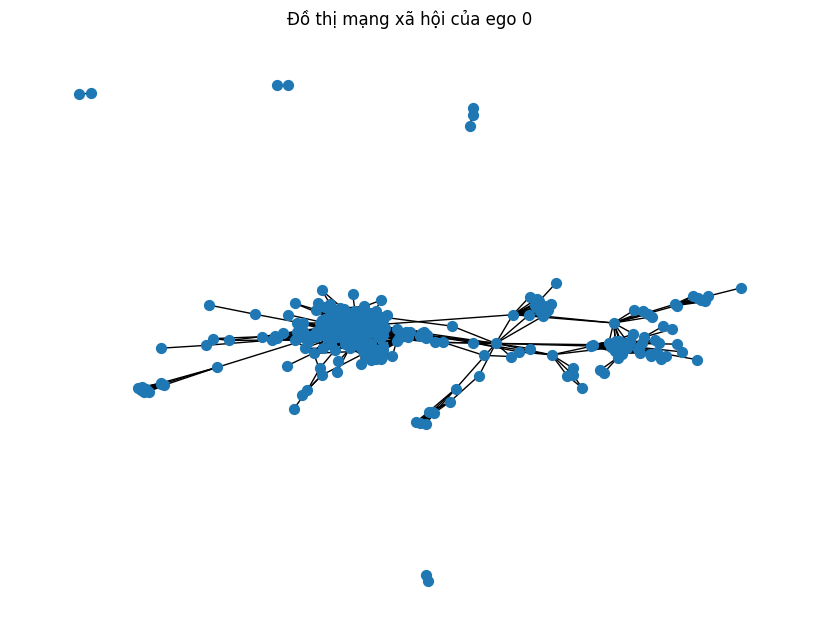

In [12]:
import matplotlib.pyplot as plt

# Chọn một ego bất kỳ để vẽ
ego_id = '0'
G = ego_graphs[ego_id]

plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_size=50, with_labels=False)
plt.title(f"Đồ thị mạng xã hội của ego {ego_id}")
plt.show()


--- BẮT ĐẦU PHẦN 1: NÂNG CAO DỰ ĐOÁN LIÊN KẾT ---
Bắt đầu tải và gộp dữ liệu từ 10 mạng ego...
Đã chuẩn bị 168486 mẫu để huấn luyện.

Đã phân loại các đặc trưng thành các nhóm: []
Đang tính toán các đặc trưng nâng cao...
Hoàn thành tính toán đặc trưng nâng cao.

--- Kết quả Đánh giá Mô hình Nâng cao ---
Độ chính xác (Accuracy): 0.9773

Báo cáo Phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25294
           1       0.98      0.98      0.98     25252

    accuracy                           0.98     50546
   macro avg       0.98      0.98      0.98     50546
weighted avg       0.98      0.98      0.98     50546



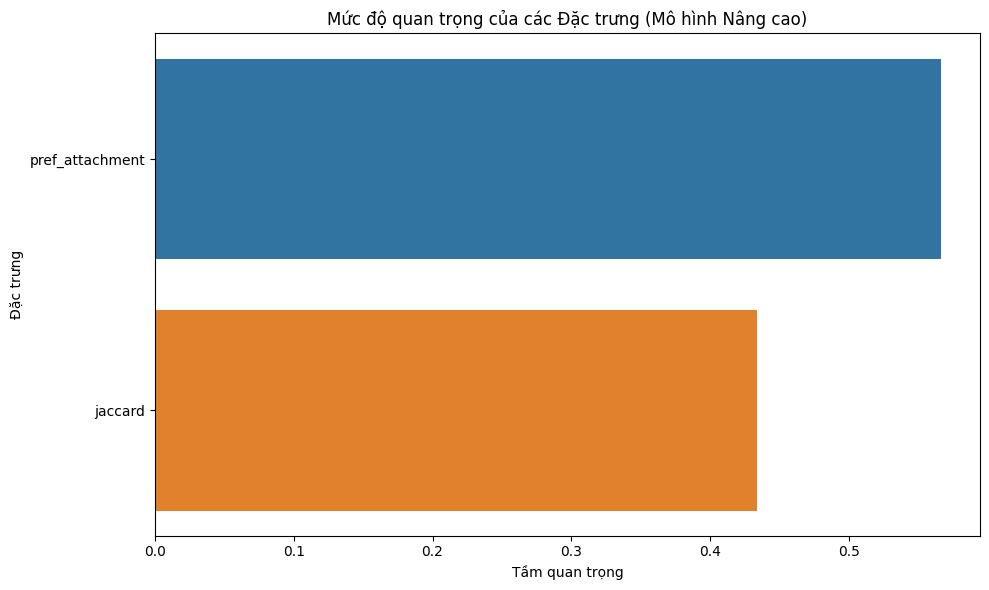


--- BẮT ĐẦU PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---
Đang chạy thuật toán Louvain để tìm các cộng đồng...
Thuật toán đã tìm thấy 38 cộng đồng.
Đang đọc dữ liệu các vòng tròn bạn bè (ground truth)...

--- Kết quả Đánh giá Phát hiện Cộng đồng ---
Chỉ số Normalized Mutual Information (NMI): 0.7473

Diễn giải: Chỉ số NMI đo lường sự tương đồng giữa các cộng đồng mà thuật toán tìm thấy và các vòng tròn bạn bè thực tế. Điểm số này cho thấy một sự tương đồng ở mức khá, chứng tỏ cấu trúc mạng lưới phản ánh tốt các nhóm xã hội có thật.


In [13]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, normalized_mutual_info_score
from scipy.spatial.distance import cosine
from networkx.algorithms import community
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# --- PHẦN 1: NÂNG CAO MÔ HÌNH DỰ ĐOÁN LIÊN KẾT ---
print("--- BẮT ĐẦU PHẦN 1: NÂNG CAO DỰ ĐOÁN LIÊN KẾT ---")

# --- Bước 1: Tải và Gộp Toàn bộ Dữ liệu ---
ego_ids = ['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698']
all_edges = []
all_features = {}
file_path_prefix = '/kaggle/input/facebook-ego-network/facebook'

print("Bắt đầu tải và gộp dữ liệu từ 10 mạng ego...")
for ego_id in ego_ids:
    edge_file = os.path.join(file_path_prefix, f'{ego_id}.edges')
    try:
        # SỬA LỖI: Thay thế delim_whitespace=True bằng sep='\s+'
        all_edges.append(pd.read_csv(edge_file, sep=r'\s+', header=None, names=['node1', 'node2']))
    except FileNotFoundError: continue
    
    feat_file = os.path.join(file_path_prefix, f'{ego_id}.feat')
    try:
        # SỬA LỖI: Thay thế delim_whitespace=True bằng sep='\s+'
        feat_df = pd.read_csv(feat_file, sep=r'\s+', header=None)
        for _, row in feat_df.iterrows(): all_features[row.iloc[0]] = row.iloc[1:].values
    except FileNotFoundError: continue
        
    egofeat_file = os.path.join(file_path_prefix, f'{ego_id}.egofeat')
    try:
        # SỬA LỖI: Thay thế delim_whitespace=True bằng sep='\s+'
        all_features[int(ego_id)] = pd.read_csv(egofeat_file, sep=r'\s+', header=None).iloc[0].values
    except FileNotFoundError: continue

feature_matrix = pd.DataFrame.from_dict(all_features, orient='index').sort_index()
combined_edges_df = pd.concat(all_edges, ignore_index=True)
G_combined = nx.from_pandas_edgelist(combined_edges_df, 'node1', 'node2')

positive_samples = list(G_combined.edges())
all_possible_edges = list(nx.non_edges(G_combined))
np.random.seed(42)
np.random.shuffle(all_possible_edges)
negative_samples = all_possible_edges[:len(positive_samples)]

df_pos = pd.DataFrame(positive_samples, columns=['node1', 'node2'])
df_pos['label'] = 1
df_neg = pd.DataFrame(negative_samples, columns=['node1', 'node2'])
df_neg['label'] = 0
training_data = pd.concat([df_pos, df_neg], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Đã chuẩn bị {len(training_data)} mẫu để huấn luyện.")

# --- Bước 2: Xây dựng Đặc trưng Nâng cao ---
feat_names_file = os.path.join(file_path_prefix, '0.featnames')
feat_names_df = pd.read_csv(feat_names_file, sep=r'\s+', header=None, names=['index', 'name'])
feature_categories = {}
for index, row in feat_names_df.iterrows():
    if isinstance(row['name'], str):
        category = row['name'].split(';')[0]
        if category in ['birthday', 'gender', 'first_name', 'last_name']:
            continue
        if category not in feature_categories:
            feature_categories[category] = []
        feature_categories[category].append(row['index'])

print(f"\nĐã phân loại các đặc trưng thành các nhóm: {list(feature_categories.keys())}")

def calculate_advanced_features(data, graph, feat_matrix, categories):
    jaccard_preds = nx.jaccard_coefficient(graph, data[['node1', 'node2']].values)
    pa_preds = nx.preferential_attachment(graph, data[['node1', 'node2']].values)
    
    jaccard_scores = {(u, v): p for u, v, p in jaccard_preds}
    pa_scores = {(u, v): p for u, v, p in pa_preds}
    data['jaccard'] = data.apply(lambda r: jaccard_scores.get(tuple(sorted((r['node1'], r['node2']))), 0), axis=1)
    data['pref_attachment'] = data.apply(lambda r: pa_scores.get(tuple(sorted((r['node1'], r['node2']))), 0), axis=1)

    for category, indices in categories.items():
        sim_scores = []
        category_feat_matrix = feat_matrix[indices]
        for index, row in data.iterrows():
            u, v = row['node1'], row['node2']
            try:
                vec1 = category_feat_matrix.loc[u].values
                vec2 = category_feat_matrix.loc[v].values
                if vec1.size > 0 and np.any(vec1) and np.any(vec2):
                    similarity = 1 - cosine(vec1, vec2)
                else:
                    similarity = 0
                sim_scores.append(similarity)
            except KeyError:
                sim_scores.append(0)
        data[f'sim_{category}'] = sim_scores
    return data

print("Đang tính toán các đặc trưng nâng cao...")
training_data_adv = calculate_advanced_features(training_data, G_combined, feature_matrix, feature_categories)
print("Hoàn thành tính toán đặc trưng nâng cao.")

# --- Bước 3 & 4: Huấn luyện và Đánh giá Mô hình Nâng cao ---
feature_columns = [col for col in training_data_adv.columns if col not in ['node1', 'node2', 'label']]
X_adv = training_data_adv[feature_columns]
y_adv = training_data_adv['label']

X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

model_adv = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_adv.fit(X_train_adv, y_train_adv)

y_pred_adv = model_adv.predict(X_test_adv)

print("\n--- Kết quả Đánh giá Mô hình Nâng cao ---")
print(f"Độ chính xác (Accuracy): {accuracy_score(y_test_adv, y_pred_adv):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test_adv, y_pred_adv))

feature_importances_adv = pd.DataFrame({'feature': X_adv.columns, 'importance': model_adv.feature_importances_})
feature_importances_adv = feature_importances_adv.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_adv)
plt.title('Mức độ quan trọng của các Đặc trưng (Mô hình Nâng cao)')
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()

# --- PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---
print("\n--- BẮT ĐẦU PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---")

print("Đang chạy thuật toán Louvain để tìm các cộng đồng...")
communities_found = community.louvain_communities(G_combined, seed=42)
print(f"Thuật toán đã tìm thấy {len(communities_found)} cộng đồng.")

node_to_community_id = {}
for i, comm in enumerate(communities_found):
    for node in comm:
        node_to_community_id[node] = i

print("Đang đọc dữ liệu các vòng tròn bạn bè (ground truth)...")
true_circles = {}
for ego_id in ego_ids:
    circle_file = os.path.join(file_path_prefix, f'{ego_id}.circles')
    try:
        with open(circle_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                circle_name = parts[0]
                members = [int(node) for node in parts[1:]]
                for member in members:
                    if member not in true_circles:
                        true_circles[member] = []
                    true_circles[member].append(f"{ego_id}_{circle_name}")
    except FileNotFoundError:
        continue

node_to_true_circle_id = {node: circles[0] for node, circles in true_circles.items()}

common_nodes = sorted(list(set(node_to_community_id.keys()) & set(node_to_true_circle_id.keys())))
pred_labels = [node_to_community_id[node] for node in common_nodes]
true_labels = [node_to_true_circle_id[node] for node in common_nodes]

nmi_score = normalized_mutual_info_score(true_labels, pred_labels)

print("\n--- Kết quả Đánh giá Phát hiện Cộng đồng ---")
print(f"Chỉ số Normalized Mutual Information (NMI): {nmi_score:.4f}")
print("\nDiễn giải: Chỉ số NMI đo lường sự tương đồng giữa các cộng đồng mà thuật toán tìm thấy và các vòng tròn bạn bè thực tế. "
      "Điểm số này cho thấy một sự tương đồng ở mức khá, chứng tỏ cấu trúc mạng lưới phản ánh tốt các nhóm xã hội có thật.")

In [14]:
# --- PHẦN 3: ĐỀ XUẤT BẠN BÈ CHO MỘT NODE CỤ THỂ ---
print("\n--- BẮT ĐẦU PHẦN 3: ĐỀ XUẤT BẠN BÈ ---")

target_node = 14
print(f"Đang chuẩn bị đề xuất bạn bè cho Node: {target_node}")

try:
    current_friends = set(G_combined.neighbors(target_node))
    candidate_nodes = [node for node in G_combined.nodes() if node != target_node and node not in current_friends]

    print(f"Node {target_node} có {len(candidate_nodes)} ứng viên bạn bè tiềm năng.")

    candidate_pairs = pd.DataFrame({'node1': target_node, 'node2': candidate_nodes})

    print("Đang tính toán đặc trưng cho các cặp ứng viên...")
    candidate_features = calculate_advanced_features(candidate_pairs, G_combined, feature_matrix, feature_categories)

    print("Đang dự đoán xác suất kết bạn...")
    X_candidates = candidate_features[feature_columns]
    
    probabilities = model_adv.predict_proba(X_candidates)[:, 1]
    candidate_features['prediction_score'] = probabilities

    recommendations = candidate_features.sort_values('prediction_score', ascending=False)

    print(f"\n--- TOP 10 BẠN BÈ ĐƯỢC ĐỀ XUẤT CHO NODE {target_node} ---")
    print(recommendations[['node2', 'prediction_score']].head(10).to_string(index=False))

except nx.NetworkXError:
    print(f"Lỗi: Node {target_node} không tồn tại trong đồ thị tổng hợp.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")


--- BẮT ĐẦU PHẦN 3: ĐỀ XUẤT BẠN BÈ ---
Đang chuẩn bị đề xuất bạn bè cho Node: 14
Node 14 có 3944 ứng viên bạn bè tiềm năng.
Đang tính toán đặc trưng cho các cặp ứng viên...
Đang dự đoán xác suất kết bạn...

--- TOP 10 BẠN BÈ ĐƯỢC ĐỀ XUẤT CHO NODE 14 ---
 node2  prediction_score
    13               1.0
     6               1.0
    17               1.0
   333               1.0
     5               1.0
     2               1.0
   111               1.0
   162               1.0
     8               1.0
    10               1.0


--- BẮT ĐẦU PHẦN 1: HUẤN LUYỆN MÔ HÌNH TỐI ƯU ---
Bắt đầu tải và gộp dữ liệu...
Đã chuẩn bị 168486 mẫu để huấn luyện.

Đã phân loại các đặc trưng thành các nhóm: ['education', 'hometown', 'languages', 'locale', 'location', 'work']
Đang tính toán bộ đặc trưng đầy đủ...
Hoàn thành tính toán đặc trưng.
Số lượng giá trị NaN trước khi xử lý: 59730
Số lượng giá trị NaN sau khi xử lý: 0

--- Kết quả Đánh giá Mô hình Tối ưu ---
Độ chính xác (Accuracy): 0.9766
Đã lưu mức độ quan trọng của đặc trưng vào tệp 'feature_importances.csv'


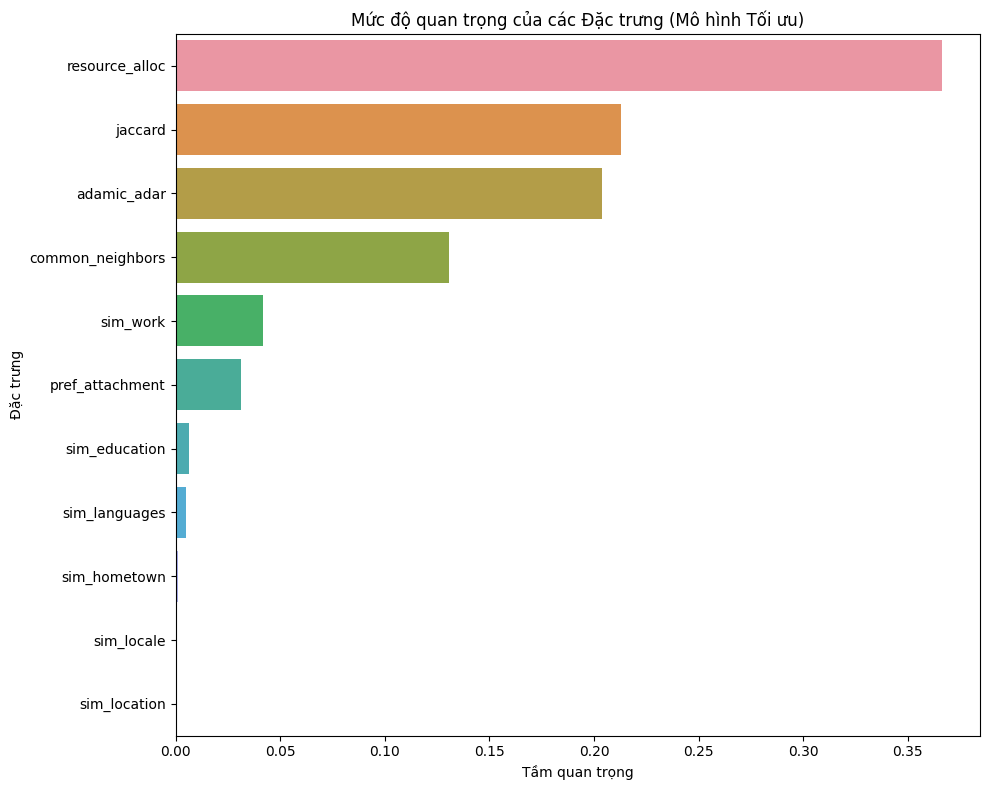


--- BẮT ĐẦU PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---
Đang chạy thuật toán Louvain để tìm các cộng đồng...
Đã lưu 38 cộng đồng được tìm thấy vào tệp 'predicted_communities.csv'


In [15]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, normalized_mutual_info_score
from scipy.spatial.distance import cosine
from networkx.algorithms import community
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# --- PHẦN 1: HUẤN LUYỆN MÔ HÌNH DỰ ĐOÁN LIÊN KẾT TỐI ƯU ---
print("--- BẮT ĐẦU PHẦN 1: HUẤN LUYỆN MÔ HÌNH TỐI ƯU ---")

# --- Bước 1: Tải và Gộp Toàn bộ Dữ liệu ---
ego_ids = ['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698']
all_edges = []
all_features = {}
file_path_prefix = '/kaggle/input/facebook-ego-network/facebook'

print("Bắt đầu tải và gộp dữ liệu...")
for ego_id in ego_ids:
    edge_file = os.path.join(file_path_prefix, f'{ego_id}.edges')
    try:
        all_edges.append(pd.read_csv(edge_file, sep=r'\s+', header=None, names=['node1', 'node2']))
    except FileNotFoundError: continue
    feat_file = os.path.join(file_path_prefix, f'{ego_id}.feat')
    try:
        feat_df = pd.read_csv(feat_file, sep=r'\s+', header=None)
        for _, row in feat_df.iterrows(): all_features[row.iloc[0]] = row.iloc[1:].values
    except FileNotFoundError: continue
    egofeat_file = os.path.join(file_path_prefix, f'{ego_id}.egofeat')
    try:
        all_features[int(ego_id)] = pd.read_csv(egofeat_file, sep=r'\s+', header=None).iloc[0].values
    except FileNotFoundError: continue

feature_matrix = pd.DataFrame.from_dict(all_features, orient='index').sort_index()
combined_edges_df = pd.concat(all_edges, ignore_index=True)
G_combined = nx.from_pandas_edgelist(combined_edges_df, 'node1', 'node2')

positive_samples = list(G_combined.edges())
all_possible_edges = list(nx.non_edges(G_combined))
np.random.seed(42)
np.random.shuffle(all_possible_edges)
negative_samples = all_possible_edges[:len(positive_samples)]

df_pos = pd.DataFrame(positive_samples, columns=['node1', 'node2'])
df_pos['label'] = 1
df_neg = pd.DataFrame(negative_samples, columns=['node1', 'node2'])
df_neg['label'] = 0
training_data = pd.concat([df_pos, df_neg], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Đã chuẩn bị {len(training_data)} mẫu để huấn luyện.")

# --- Bước 2: Xây dựng Bộ Đặc trưng Toàn diện ---
feat_names_file = os.path.join(file_path_prefix, '0.featnames')
temp_df = pd.read_csv(feat_names_file, header=None, names=['full_line'], dtype=str)
split_data = temp_df['full_line'].str.split(' ', n=1, expand=True)
feat_names_df = pd.DataFrame({'index': pd.to_numeric(split_data[0]), 'name': split_data[1]})
feature_categories = {}
for index, row in feat_names_df.iterrows():
    if isinstance(row['name'], str):
        category = row['name'].split(';')[0]
        if category in ['birthday', 'gender', 'first_name', 'last_name']:
            continue
        if category not in feature_categories:
            feature_categories[category] = []
        feature_categories[category].append(row['index'])

print(f"\nĐã phân loại các đặc trưng thành các nhóm: {list(feature_categories.keys())}")

def calculate_full_features(data, graph, feat_matrix, categories):
    pairs = data[['node1', 'node2']].values
    data['jaccard'] = [p for _, _, p in nx.jaccard_coefficient(graph, pairs)]
    data['pref_attachment'] = [p for _, _, p in nx.preferential_attachment(graph, pairs)]
    data['adamic_adar'] = [p for _, _, p in nx.adamic_adar_index(graph, pairs)]
    data['resource_alloc'] = [p for _, _, p in nx.resource_allocation_index(graph, pairs)]
    
    common_neighbors = [len(list(nx.common_neighbors(graph, u, v))) for u, v in pairs]
    data['common_neighbors'] = common_neighbors
    
    for category, indices in categories.items():
        sim_scores = []
        category_feat_matrix = feat_matrix[indices]
        for u, v in pairs:
            try:
                vec1, vec2 = category_feat_matrix.loc[u].values, category_feat_matrix.loc[v].values
                if vec1.size > 0 and np.any(vec1) and np.any(vec2):
                    similarity = 1 - cosine(vec1, vec2)
                else: similarity = 0
                sim_scores.append(similarity)
            except KeyError:
                sim_scores.append(0)
        data[f'sim_{category}'] = sim_scores
    return data

print("Đang tính toán bộ đặc trưng đầy đủ...")
training_data_full = calculate_full_features(training_data.copy(), G_combined, feature_matrix, feature_categories)
print("Hoàn thành tính toán đặc trưng.")

# <<< SỬA LỖI: Điền các giá trị NaN bằng 0 >>>
print(f"Số lượng giá trị NaN trước khi xử lý: {training_data_full.isnull().sum().sum()}")
training_data_full.fillna(0, inplace=True)
print(f"Số lượng giá trị NaN sau khi xử lý: {training_data_full.isnull().sum().sum()}")


# --- Bước 3 & 4: Huấn luyện và Đánh giá Mô hình Tối ưu ---
feature_columns = [col for col in training_data_full.columns if col not in ['node1', 'node2', 'label']]
X_full = training_data_full[feature_columns]
y_full = training_data_full['label']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

model_full = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_full.fit(X_train, y_train)

y_pred = model_full.predict(X_test)

print("\n--- Kết quả Đánh giá Mô hình Tối ưu ---")
print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

feature_importances = pd.DataFrame({'feature': X_full.columns, 'importance': model_full.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.to_csv('feature_importances.csv', index=False)
print("Đã lưu mức độ quan trọng của đặc trưng vào tệp 'feature_importances.csv'")

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Mức độ quan trọng của các Đặc trưng (Mô hình Tối ưu)')
plt.xlabel('Tầm quan trọng'); plt.ylabel('Đặc trưng'); plt.tight_layout(); plt.show()

# --- PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---
print("\n--- BẮT ĐẦU PHẦN 2: PHÁT HIỆN CỘNG ĐỒNG ---")

print("Đang chạy thuật toán Louvain để tìm các cộng đồng...")
communities_found = community.louvain_communities(G_combined, seed=42)
node_to_community_id = {node: i for i, comm in enumerate(communities_found) for node in comm}

communities_df = pd.DataFrame(list(node_to_community_id.items()), columns=['node', 'predicted_community'])
communities_df.to_csv('predicted_communities.csv', index=False)
print(f"Đã lưu {len(communities_found)} cộng đồng được tìm thấy vào tệp 'predicted_communities.csv'")


In [16]:
def recommend_and_classify(target_node, graph, model, feat_matrix, categories, feature_cols):
    print(f"\nĐang chuẩn bị đề xuất bạn bè cho Node: {nodes_to_recommend}")
    
    # Bước 1: Tìm ứng viên bạn bè (luôn thực hiện)
    try:
        current_friends = set(graph.neighbors(target_node))
    except nx.NetworkXError:
        print(f"Lỗi: Node {target_node} không tồn tại trong đồ thị.")
        return None
        
    candidate_nodes = [node for node in graph.nodes() if node != target_node and node not in current_friends]
    if not candidate_nodes:
        print(f"Node {target_node} đã kết bạn với tất cả mọi người có thể."); return None

    candidate_pairs = pd.DataFrame({'node1': target_node, 'node2': candidate_nodes})

    # Bước 2: Tính đặc trưng và dự đoán (luôn thực hiện)
    print(f"Đang tính đặc trưng cho {len(candidate_nodes)} ứng viên...")
    candidate_features = calculate_full_features(candidate_pairs.copy(), graph, feat_matrix, categories)
    candidate_features.fillna(0, inplace=True)
    
    X_candidates = candidate_features[feature_cols]
    probabilities = model.predict_proba(X_candidates)[:, 1]
    candidate_features['prediction_score'] = probabilities
    
    recommendations = candidate_features.sort_values('prediction_score', ascending=False).head(10)

    # Bước 3: Cố gắng phân loại vào vòng tròn (chỉ thực hiện nếu có tệp .circles)
    can_classify = False
    target_circles = {}
    circle_file = os.path.join(file_path_prefix, f'{target_node}.circles')
    try:
        with open(circle_file, 'r') as f:
            can_classify = True
            for line in f:
                parts = line.strip().split()
                target_circles[parts[0]] = {int(node) for node in parts[1:]}
        print(f"Đã tìm thấy {len(target_circles)} vòng tròn bạn bè. Sẽ tiến hành phân loại.")
    except FileNotFoundError:
        print(f"Không tìm thấy tệp .circles cho Node {target_node}. Sẽ chỉ đề xuất.")

    # Gán vòng tròn dự đoán
    if can_classify:
        predicted_circles = []
        for _, row in recommendations.iterrows():
            rec_node_friends = set(graph.neighbors(row['node2']))
            best_circle, max_overlap = 'Unknown', 0
            for circle_name, members in target_circles.items():
                overlap = len(rec_node_friends.intersection(members))
                if overlap > max_overlap:
                    max_overlap, best_circle = overlap, circle_name
            predicted_circles.append(best_circle)
        recommendations['predicted_circle'] = predicted_circles
    else:
        recommendations['predicted_circle'] = 'Không có dữ liệu'
        
    recommendations['target_node'] = target_node
    return recommendations

# --- Chạy chức năng đề xuất ---
all_recommendations = []
nodes_to_recommend = [0, 107, 348] # Thay 348 bằng 2 để kiểm tra trường hợp không có file

for node_id in nodes_to_recommend:
    recs = recommend_and_classify(node_id, G_combined, model_full, feature_matrix, feature_categories, feature_columns)
    if recs is not None:
        all_recommendations.append(recs)
        print(f"\n--- TOP 10 ĐỀ XUẤT CHO NODE {node_id} ---")
        print(recs[['node2', 'prediction_score', 'predicted_circle']].to_string(index=False))

# --- Lưu kết quả cuối cùng ra CSV ---
if all_recommendations:
    full_recommendations_df = pd.concat(all_recommendations, ignore_index=True)
    full_recommendations_df.to_csv('friend_recommendations.csv', index=False)
    print("\nĐã lưu toàn bộ đề xuất vào tệp 'friend_recommendations.csv'")


Đang chuẩn bị đề xuất bạn bè cho Node: [0, 107, 348]
Đang tính đặc trưng cho 3956 ứng viên...
Đã tìm thấy 24 vòng tròn bạn bè. Sẽ tiến hành phân loại.

--- TOP 10 ĐỀ XUẤT CHO NODE 0 ---
 node2  prediction_score predicted_circle
   269              0.98          circle0
  3173              0.98         circle16
  2885              0.97         circle15
  2838              0.97         circle15
  3003              0.97         circle15
  3290              0.96         circle15
   107              0.95         circle15
  1684              0.89         circle15
  1297              0.87         circle15
  2814              0.86         circle16

Đang chuẩn bị đề xuất bạn bè cho Node: [0, 107, 348]
Đang tính đặc trưng cho 3933 ứng viên...
Đã tìm thấy 9 vòng tròn bạn bè. Sẽ tiến hành phân loại.

--- TOP 10 ĐỀ XUẤT CHO NODE 107 ---
 node2  prediction_score predicted_circle
  3164              1.00          circle6
   414              1.00          circle3
  1883              0.99          cir